In [7]:
import numpy as np
import matplotlib.pyplot as plt

Далее запишем $Ф_f(c)$

In [8]:
def Fi(c, h):
    s = 0
    for i in range(1, len(c) - 1):
        s += 2*(c[i]**2 - c[i] * (c[i+1] + c[i-1]))/h + 4*h*(c[i]**2 / 3 - c[i] * (c[i+1] + c[i-1])/6) + h*c[i] + h*(np.log(c[i]**2 + 1)/2 - c[i] * np.arctan(c[i]))
    
    return s
    

In [9]:
N = 99
h = 1/(N+1)

c = np.zeros((N+2, 10))

for i in range(N):
    # c[i+1, 0] = (np.exp(2*i*h) * (np.exp(-2) - 2) + np.exp(-2*i*h))/(4 * (np.exp(-2) - 1)) - 1/4
    c[i+1, 0] = 1

# print (c)
print (Fi(c[:,0], h))

-19399.43110299406


In [10]:
def sled_c(c, h, w):
    r = np.zeros(N+2)

    for i in range(1, len(c) - 1):
        r[i] = c[i] - w*( 2*c[i] - c[i+1] - c[i-1]  + h**2 * (c[i]*2 / 3 - (c[i+1] + c[i-1])/6) + h**2 - (h**2 + i**2 * h**4)*np.arctan(c[i]) )
    
    return r

In [11]:
for i in range(1, 9):
    count = 0
    w = 2

    print (Fi(c[:,i], h), Fi(c[:,i-1], h))

    while count < 20 or Fi(c[:,i], h) > Fi(c[:,i-1], h):
        w = w/2
        # print (w)
        c[:,i+1] = sled_c(c[:,i], h, w)
        count += 1
    
print (c)
print (c[:,8])





0.0 -19399.43110299406


KeyboardInterrupt: 

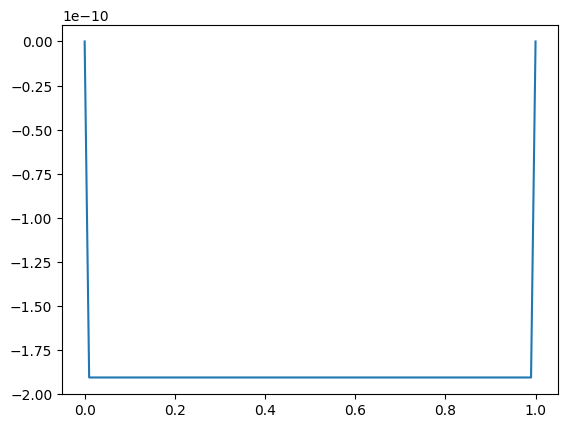

In [ ]:
t = np.linspace(0,1,N+2)


plt.plot(t, c[:,8])
plt.show()